In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns

In [12]:
def ends(df, n):
    """Show both head and tail of a pandas series or dataframe.
    
    Parameters
    -----------
    n: int
        # of rows to display in head and tail, respectively (i.e. the total
        # of rows displayed will be 2*n).
    """
    return pd.concat([df.head(n), df.tail(n)], axis=0)

In [13]:
def top_cats(df, col, cats=None, val=None):
    """Filter a df to only include the most common categories.
    
    Parameters
    -----------
    cats: int
        Optional - # of categories to include (i.e. top 5 most common
        categories).
    val: int
        Optional - Value count threshold to include (i.e. all categories that
        occur at least 10 times).
    """
    if cats is not None:
        top = df[col].value_counts(ascending=False).head(cats).index
        return df[df[col].isin(top)]
    if val is not None:
        return df.groupby(col).filter(lambda x: len(x) >= val)

In [14]:
pd.DataFrame.ends = ends
pd.Series.ends = ends

In [25]:
df = pd.read_csv('data/final.csv', parse_dates=['dob'])
print(df.shape)
df.ends(3)

(2589, 47)


,d,l,nc,w,association,country,dob,fname,height1,height2,...,z_td_acc,z_td_avg,z_td_def,z_eff,z_active,z_grind,z_st_ratio,z_age,z_ape_ratio,fights
0,0,4,0.0,13,The Kennel Fight Club,USA,1989-09-22,Corey,75.0,75.0,...,0.788867,1.671040,1.272282,0.167906,0.081024,NaN,-0.457772,-1.282854,0.907691,17.0
1,0,4,0.0,18,Jackson-Wink MMA,USA,1984-09-20,Quinn,75.0,75.0,...,-0.445737,-0.124767,-0.408081,-0.279619,-0.803921,NaN,-0.349774,-0.182323,-0.379793,22.0
2,0,3,0.0,20,Wand Fight Team,USA,1969-10-31,Jason,66.0,66.0,...,-0.674560,0.327581,-0.007771,-1.198965,-0.650687,NaN,-0.764141,3.390778,NaN,23.0
2586,0,4,0.0,7,NaN,NaN,1980-10-16,Rafael,65.0,NaN,...,0.056213,0.906888,0.783814,-0.447846,-0.371495,0.533514,-0.622730,1.167663,0.363415,11.0
2587,1,1,0.0,6,NaN,NaN,1990-06-11,Matt,69.0,NaN,...,0.256007,0.442924,1.187314,-0.021923,0.768572,-0.343374,-0.235104,-1.290348,0.184593,8.0
2588,0,8,3.0,20,NaN,NaN,1975-05-18,Ross,69.0,NaN,...,2.361239,1.093946,-1.461042,0.073004,-1.534257,NaN,-0.557066,1.627098,NaN,31.0


In [26]:
df.columns

Index(['d', 'l', 'nc', 'w', 'association', 'country', 'dob', 'fname',
       'height1', 'height2', 'lname', 'locality', 'name1', 'nick1', 'reach',
       'sapm', 'slpm', 'stance', 'str_acc', 'str_def', 'sub_avg', 'td_acc',
       'td_avg', 'td_def', 'weight1', 'eff', 'active', 'grind', 'ape_ratio',
       'st_ratio', 'age', 'wc', 'w_pct', 'z_sapm', 'z_slpm', 'z_str_acc',
       'z_str_def', 'z_td_acc', 'z_td_avg', 'z_td_def', 'z_eff', 'z_active',
       'z_grind', 'z_st_ratio', 'z_age', 'z_ape_ratio', 'fights'],
      dtype='object')

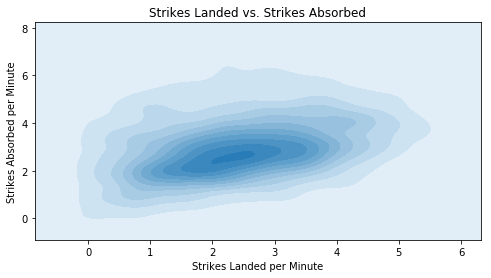

In [94]:
q = .95
tmp = df.loc[(df.slpm < df.slpm.quantile(q)) & 
             (df.sapm < df.sapm.quantile(q))]

fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(tmp.slpm, tmp.sapm, shade=True, ax=ax)
plt.xlabel('Strikes Landed per Minute')
plt.ylabel('Strikes Absorbed per Minute')
plt.title('Strikes Landed vs. Strikes Absorbed')
plt.show()

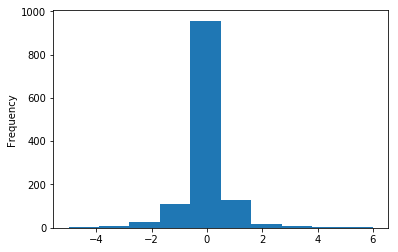

In [101]:
diffs = (df.height1 - df.height2).dropna()
diffs.plot.hist()

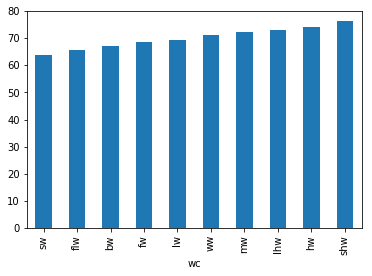

In [110]:
df.groupby('wc').height1.mean().sort_values().plot.bar()

In [96]:
df.height2.isnull().sum()

1318